# **Nhóm: 24**

**Đề tài:** Time Series Forecasting

**Thành viên:**

21110374: Trần Anh Quân

21110372: Trần Trọng Phúc

21110402: Đặng Phúc thịnh

**A. GIỚI THIỆU CHUNG (TIME SERIES)**

---



  Chuỗi thời gian (*Time Series*) là một loại dữ liệu trong kinh doanh và thống kê được sắp xếp theo thời gian. Nó thể hiện sự thay đổi hoặc biến đổi của một biến hoặc một tập hợp các biến qua các khoảng thời gian liên tiếp. Chuỗi thời gian thường được sử dụng để phân tích và dự đoán xu hướng, mô hình sự biến đổi theo thời gian và làm quyết định dựa trên dữ liệu lịch sử.

Chuỗi thời gian có thể được phân tích ra 4 thành phần bao gồm: 3 thành phần liên quan tới tần sống và 1 thành phần ngẫu nhiên

* Thành phần xu thế, định hướng (*trend component*) là định hướng dài hạn của dữ liệu, thường kỳ đại hết không thời gian ta quan tâm.

* Thành phần chu kỳ (*cyclical component*) là những bước ngoặt của mức cao và mức thấp mà địa lý trị qua khoảng thời gian dài thường là hơn một năm.

* Thành phần theo mùa (*seasonality component*) tương tự như thành phần chu kỳ nhưng ngắn hơn, thường kéo dài trong một kỳ thời gian ngắn hơn một năm.

* Thành phần không đều, không thường xuyên (*irregular component*) là những thay đổi nhạnh chóng hay tiếng "bíp" của dữ liệu xảy ra trong thời gian ngắn hơn khoảng thời gian của thành phần mùa.

**Dưới đây là đồ thị minh họa 4 thành phần trên**

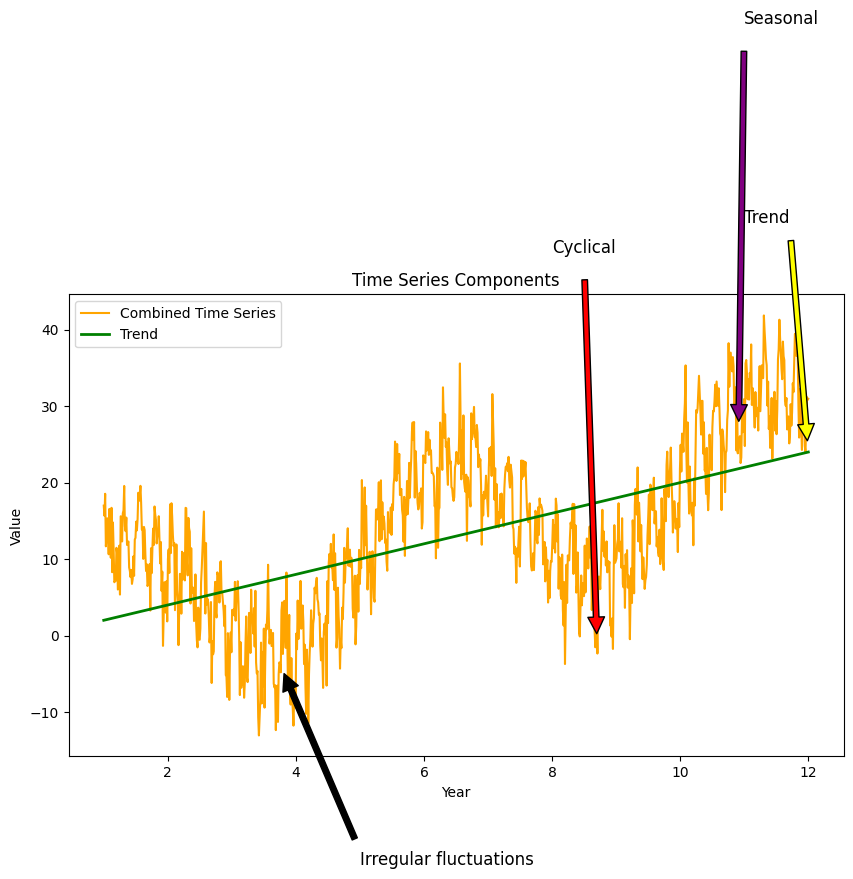

In [306]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(1, 12, 1000)
trend = time * 2
cyclical = 10 * np.sin(time * 2 * np.pi / 5)
seasonal = 5 * np.sin(time * 8 * np.pi)
irregular = np.random.normal(0, 1, size=time.shape) * 3

# Combine components into a single time series
time_series_combined = trend + cyclical + seasonal + irregular

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, time_series_combined, label='Combined Time Series', color='orange')
plt.plot(time, trend, label='Trend', color='green', linewidth=2)

# Highlight the components on the plot
plt.annotate('Cyclical', xy=(time[700], time_series_combined[700]), xytext=(8, 50),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)
plt.annotate('Trend', xy=(12, trend[-1]), xytext=(11, trend[-1] + 30),
             arrowprops=dict(facecolor='yellow', shrink=0.05), fontsize=12)
plt.annotate('Seasonal', xy=(time[900], time_series_combined[900]), xytext=(11, 80),
             arrowprops=dict(facecolor='purple', shrink=0.05), fontsize=12)
plt.annotate('Irregular fluctuations', xy=(time[250], time_series_combined[250]), xytext=(5, -30),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# Setting up the axes and titles
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series Components')
plt.legend()

# Show the plot
plt.show()

B. GIỚI THIỆU ĐỀ TÀI: TIME SERIES FORECASTING


---




Dự báo chuỗi thời gian là quá trình sử dụng mô hình để dự đoán các giá trị tương lai dựa trên các quan sát trong quá khứ và hiện tại. Mục tiêu là dự đoán xu hướng hoặc mẫu trong dữ liệu, giúp ra quyết định kinh doanh, lập kế hoạch, và nhiều ứng dụng khác.

Để hiểu rõ hơn về Time Series Forecasting (Dự báo chuỗi thời gian) và ứng dụng chúng trong lĩnh vực kinh doanh như thế nào, thì chúng ta cùng tìm hiểu qua hai phương pháp dự báo chuỗi thời gian trong việc tính doanh thu, doanh số bán hàng:

* Phương pháp phân rã mô hình và sử dụng mô hình cộng và mô hình nhân

* Phương pháp Prophet


Dưới đây, ta hãy cùng tìm hiểu 2 phương pháp và so sánh 2 phương pháp đó với dữ liệu được sử dụng trong mô hình là dữ liệu của một cửa hàng với đơn vị là Nghìn USD

***I. Sử dụng dự báo chuỗi thời gian trong việc tính doanh thu, doanh số bán hàng***

---



***1. Mô hình phân rã***

---



Mô hình phân rã phân tách hoặc chia nhỏ dữ liệu chuỗi thời gian thành ba thành phần:

* Thành phần xu hướng
* Thành phần thời vụ
* Thành phần nhiễu

*Từ 3 thành phần này, ta có thể biết được xu hướng và tính mùa vụ của dữ liệu*



Tập dữ liệu sử dụng trong mô hình này là tập dữ liệu của một cửa hàng bán áo quần, biết doanh thu theo từng tháng từ 2018 đến giữa 2022, (đơn vị: nghìn USD)

1. Import các thư viện cần dùng

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2**. Tải, tinh chỉnh dữ liệu

In [308]:
sales_data = pd.read_csv('/content/BANHANG.csv')
sales_data.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.6,150.9
1,2010,83.9,77.6,86.1,118.7,99.7,92.0,87.0,91.4,97.3,105.4,124.9,140.1
2,2011,86.7,72.9,86.2,121.3,96.6,92.0,85.5,93.6,98.2,103.2,126.1,141.7
3,2012,85.6,65.8,89.2,125.6,99.6,94.4,88.9,90.2,100.2,102.7,121.6,139.6
4,2013,77.3,81.2,85.8,115.7,100.3,89.7,NaN,NaN,NaN,NaN,NaN,NaN


3. Trực quan hóa dữ liệu

In [309]:
sales_data_fix = sales_data.melt(id_vars=["year"], var_name="month", value_name="sales")
sales_data_fix["date"] = pd.to_datetime(sales_data_fix["year"].astype(str) + sales_data_fix["month"], format="%Y%b")
sales_data_fix = sales_data_fix.sort_values("date")


In [310]:
sales_data_fix=sales_data_fix.dropna()

Hiển thị dữ liệu dưới dạng vừa chuẩn hóa

In [311]:
sales_data_fix

,year,month,sales,date
50,2009,nov,123.6,2009-11-01
55,2009,dec,150.9,2009-12-01
1,2010,jan,83.9,2010-01-01
6,2010,feb,77.6,2010-02-01
11,2010,mar,86.1,2010-03-01
16,2010,apr,118.7,2010-04-01
21,2010,may,99.7,2010-05-01
26,2010,jun,92.0,2010-06-01
31,2010,jul,87.0,2010-07-01
36,2010,aug,91.4,2010-08-01


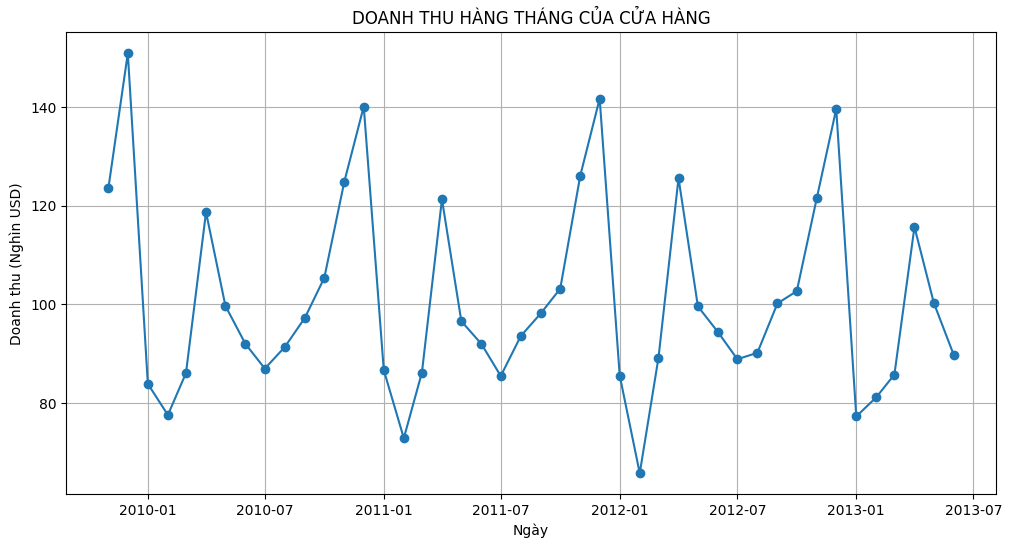

In [312]:
# Vẽ biểu đồ biểu diễn dữ liệu
plt.figure(figsize=(12, 6))
plt.plot(sales_data_fix["date"], sales_data_fix["sales"], marker='o')
plt.title("DOANH THU HÀNG THÁNG CỦA CỬA HÀNG")
plt.xlabel("Ngày")
plt.ylabel("Doanh thu (Nghìn USD)")
plt.grid(True)
plt.show()



*4.  Phương pháp phân rã mô hình*

Hàm `seasonal_decompose` từ thư viện `statsmodels` trong Python được sử dụng để phân rã một chuỗi thời gian thành các thành phần cơ bản của nó, bao gồm xu hướng (trend), tính mùa vụ (seasonality), và phần dư (residual)

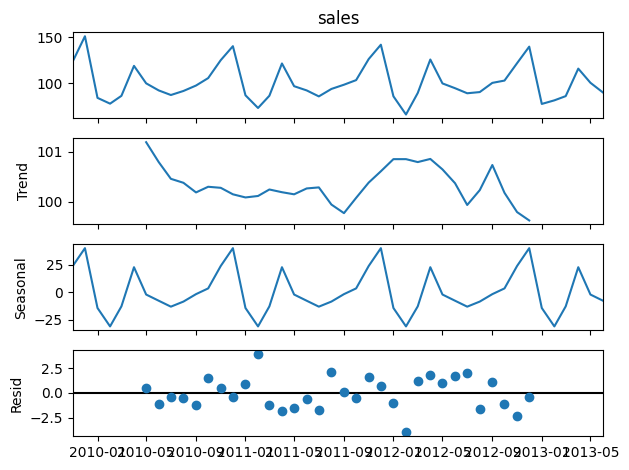

In [313]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Đặt cột 'date' làm chỉ số (index) cho DataFrame
sales_data_fix.set_index('date', inplace=True)

# Thực hiện phân rã
# Vì chúng ta biết dữ liệu là hàng tháng, nên chu kỳ mùa là 12
decomposition = seasonal_decompose(sales_data_fix['sales'], model='additive', period=12)
# Vẽ biểu đồ các thành phần sau khi phân rã
decomposition.plot()
plt.show()

# Trích xuất các thành phần xu hướng và mùa vụ
trend_component = decomposition.trend
seasonal_component = decomposition.seasonal



Nhận thấy, Đồ thị trên cùng là đồ thị khi chưa phân rã
Đồ thị *Trend* là đồ thị xu hướng, nhìn vào ta thấy có xu hướng giảm
Còn đồ thị *seasonal* cho thấy cửa hàng có doanh thu nhiều nhất và ít nhất ở những tháng nào rất rõ

Tiến hành thử dự báo doanh thu của các tháng tiếp theo.
- Ta giả sử cần dự báo 1 năm tiếp theo của cửa hàng

Ở phương pháp phân rã này, ta sẽ giới thiệu 2 mô hình phân tích là mô hình cộng và mô hình nhân.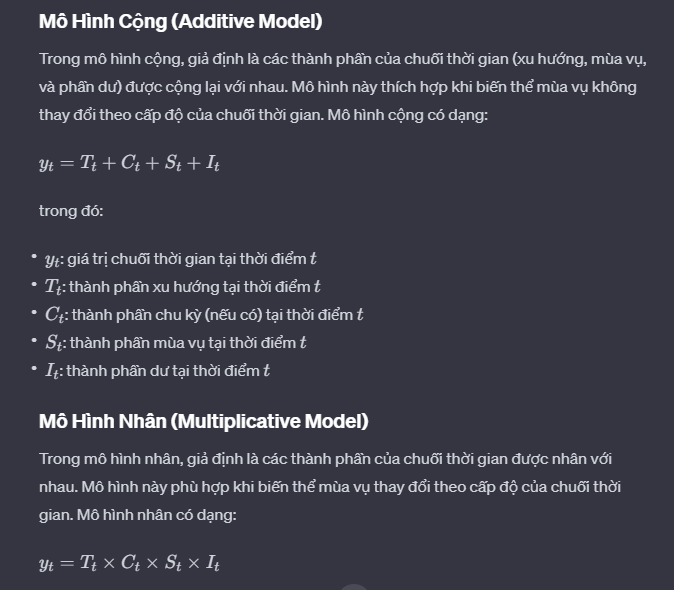


In [314]:

# Áp dụng phân tích phân rã mùa vụ cho mô hình cộng
decompose_additive = seasonal_decompose(sales_data_fix['sales'], model='additive', period=12)

# Áp dụng phân tích phân rã mùa vụ cho mô hình nhân
decompose_multiplicative = seasonal_decompose(sales_data_fix['sales'], model='multiplicative', period=12)

# Trích xuất các thành phần từ mô hình cộng
additive_trend = decompose_additive.trend
additive_seasonal = decompose_additive.seasonal
additive_residual = decompose_additive.resid

# Trích xuất các thành phần từ mô hình nhân
multiplicative_trend = decompose_multiplicative.trend
multiplicative_seasonal = decompose_multiplicative.seasonal
multiplicative_residual = decompose_multiplicative.resid



In [315]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Xây dựng mô hình dự báo Holt-Winters với mô hình cộng
model_additive = ExponentialSmoothing(sales_data_fix['sales'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model_additive = model_additive.fit()

# Dự báo với mô hình cộng
forecast_additive = fitted_model_additive.forecast(12)

# Xây dựng mô hình dự báo Holt-Winters với mô hình nhân
model_multiplicative = ExponentialSmoothing(sales_data_fix['sales'], trend='add', seasonal='mul', seasonal_periods=12)
fitted_model_multiplicative = model_multiplicative.fit()

# Dự báo với mô hình nhân
forecast_multiplicative = fitted_model_multiplicative.forecast(12)

# Hiển thị kết quả dự báo
# Tạo lại DataFrame dự báo với ngày tháng chính xác
forecast_df = pd.DataFrame({
    'Month': pd.date_range(start= '2013-07-31' , periods=12, freq='M'),
    'Forecast Additive Model': forecast_additive.values,
    'Forecast Multiplicative Model': forecast_multiplicative.values
})

forecast_df


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Month,Forecast Additive Model,Forecast Multiplicative Model
0,2013-07-31,85.991733,85.967435
1,2013-08-31,90.591591,90.512242
2,2013-09-30,97.425001,97.244624
3,2013-10-31,102.625099,102.386786
4,2013-11-30,122.622959,121.986573
5,2013-12-31,141.647966,140.715655
6,2014-01-31,81.947922,82.001070
7,2014-02-28,72.947910,73.130436
8,2014-03-31,85.397939,85.373102
9,2014-04-30,118.897960,118.317992


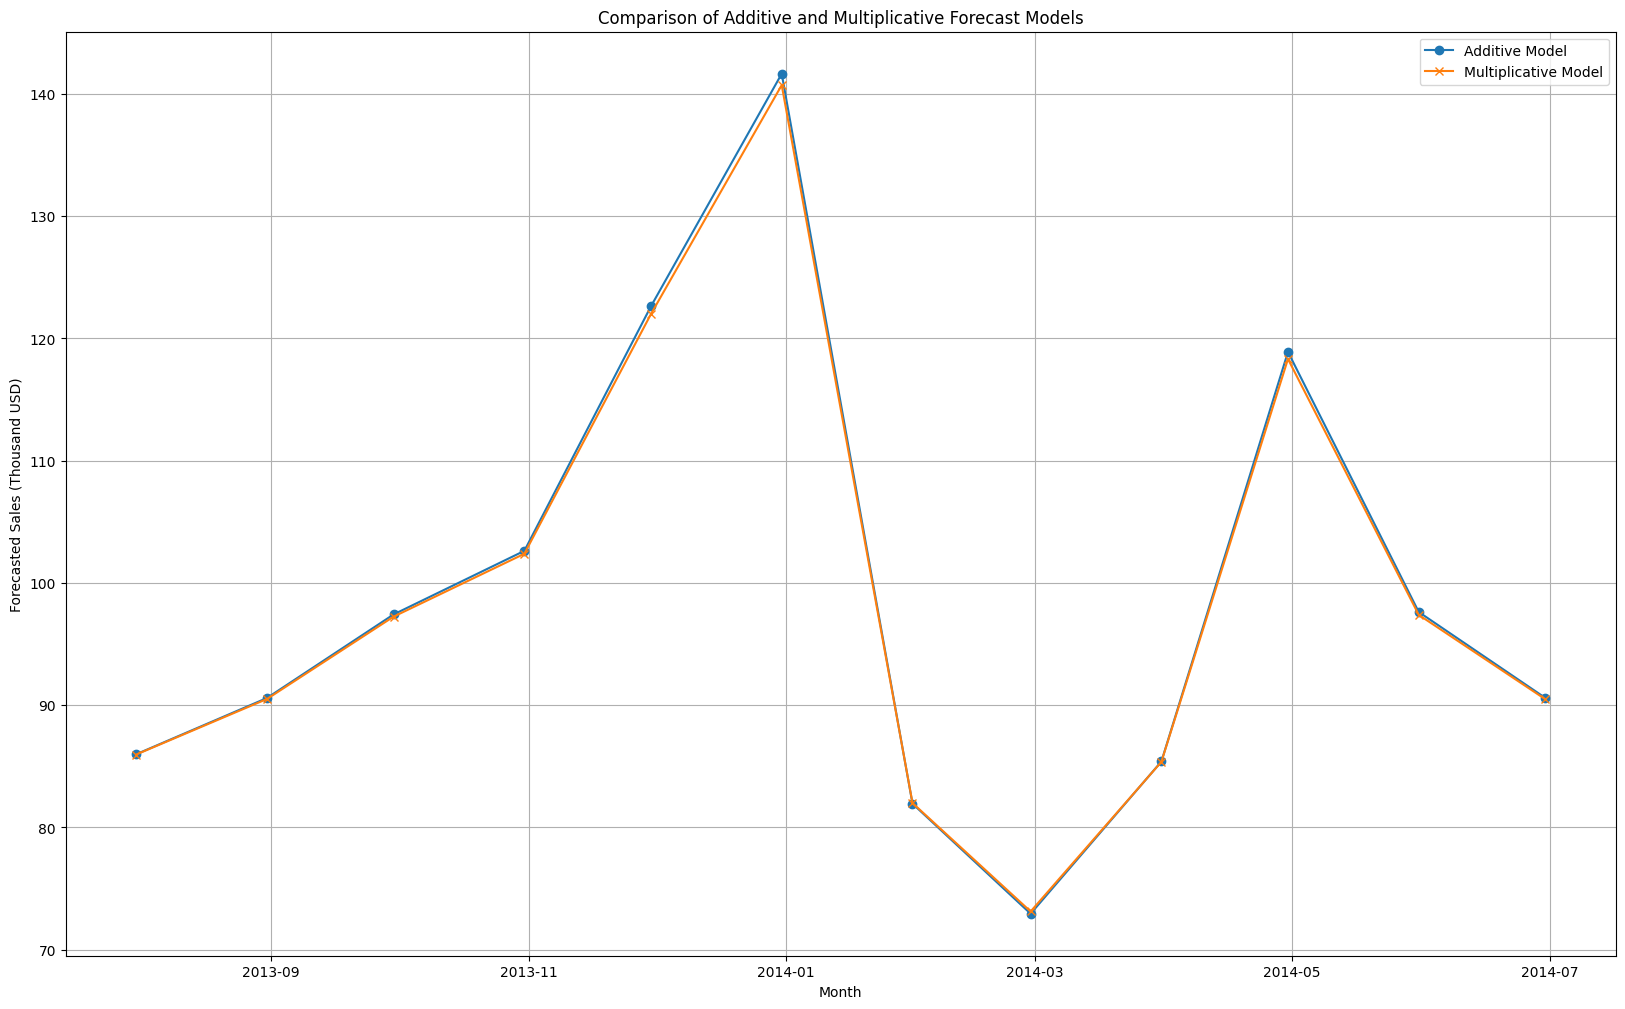

In [316]:
plt.figure(figsize=(20, 12))
plt.plot(forecast_df['Month'], forecast_df['Forecast Additive Model'], label='Additive Model', marker='o')
plt.plot(forecast_df['Month'], forecast_df['Forecast Multiplicative Model'], label='Multiplicative Model', marker='x')
plt.title('Comparison of Additive and Multiplicative Forecast Models')
plt.xlabel('Month')
plt.ylabel('Forecasted Sales (Thousand USD)')
plt.legend()
plt.grid(True)
plt.show()

Như ta thấy ở đồ thị, 2 mô hình Cộng và Nhân trong Phương pháp Tách/Phân rã không có chênh lệch lớn

Cho thấy hai phương pháp này gần như là như nhau

---
---

**Sử dụng Prophet trong dự báo doanh số**

Thuật toán Prophet khá đơn giản, thuật toán sử dụng phương pháp Markov chain Monte Carlo (MCMC)

* Là một họ gồm nhiều thuật toán thường dùng để lấy mẫu phân bố xác suất nhiều chiều dựa trên việc xây dựng xích Markov có phân bố dừng tương ứng và kỹ thuật gieo điểm ngẫu nhiên Monte Carlo
* Ý tưởng cơ bản của thuật toán là gieo điểm ngẫu nhiên và dịch chuyển ngẫu nhiên dựa trên những hàm mật độ xác suất phụ hợp và hợp lý đối với đồ thị đã cho. và dựa theo điểm đó, ta tiến hành dịch chuyển quanh điểm ngẫu nhiên đó và sẽ tìm ra điểm gần như chính xác của các dự đoán tiếp theo

Prophet không có sẵn trong python nên đầu tiên ta tải về trước




In [317]:
pip install prophet

1. Dữ liệu

In [318]:
sales_data

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.6,150.9
1,2010,83.9,77.6,86.1,118.7,99.7,92.0,87.0,91.4,97.3,105.4,124.9,140.1
2,2011,86.7,72.9,86.2,121.3,96.6,92.0,85.5,93.6,98.2,103.2,126.1,141.7
3,2012,85.6,65.8,89.2,125.6,99.6,94.4,88.9,90.2,100.2,102.7,121.6,139.6
4,2013,77.3,81.2,85.8,115.7,100.3,89.7,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
sales_data_prophet = sales_data.melt(id_vars=["year"], var_name="month", value_name="sales")
sales_data_prophet["date"] = pd.to_datetime(sales_data_prophet["year"].astype(str) + sales_data_prophet["month"], format="%Y%b")
sales_data_prophet = sales_data_prophet.sort_values("date")


In [320]:
sales_data_prophet = sales_data_prophet.dropna()
columns_to_drop = ['month', 'year']

# Sử dụng phương thức drop với tham số columns
sales_data_prophet = sales_data_prophet.drop(columns=columns_to_drop)
sales_data_prophet

,sales,date
50,123.6,2009-11-01
55,150.9,2009-12-01
1,83.9,2010-01-01
6,77.6,2010-02-01
11,86.1,2010-03-01
16,118.7,2010-04-01
21,99.7,2010-05-01
26,92.0,2010-06-01
31,87.0,2010-07-01
36,91.4,2010-08-01


In [321]:
sales_data_prophet['date'] = pd.to_datetime(sales_data_prophet['date']) #định dạng lại ngày cho dữ liệu để sử dụng chuỗi thời gian dễ dàng hơn

In [322]:
sales_data_prophet.columns = ['y','ds']
#Ta sẽ đặt ds là cột thời gian còn y là cột doanh số ứng với thời gian đó
sales_data_prophet.head()

,y,ds
50,123.6,2009-11-01
55,150.9,2009-12-01
1,83.9,2010-01-01
6,77.6,2010-02-01
11,86.1,2010-03-01


In [323]:
from prophet import Prophet

Cài đặt mô hình Prophet với `interval_width` có thể xem như độ tin cậy/chắc chắn của dữ liệu

In [324]:
model = Prophet(interval_width= 0.9)
model.fit(sales_data_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu3bcre_a/kvd6klry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu3bcre_a/7eqwk091.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18574', 'data', 'file=/tmp/tmpu3bcre_a/kvd6klry.json', 'init=/tmp/tmpu3bcre_a/7eqwk091.json', 'output', 'file=/tmp/tmpu3bcre_a/prophet_modelgjf79qhl/prophet_model-20240120153021.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:30:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [325]:
future = model.make_future_dataframe(periods=12, freq = 'MS') # Ta tiến hành "tiên tri" 12 tháng sau đó

Tiến hành "Tiên tri" với dữ liệu trên

Trong mô hình prophet có nhiều cột dữ liệu nhưng ta chỉ cần quan tâm cột yhat, đây là cột đưa ra giá trị dự đoán cuối cùng

In [326]:
forecast = model.predict(future)
selected_columns = forecast[['ds', 'yhat']]
selected_columns


,ds,yhat
0,2009-11-01,124.741390
1,2009-12-01,144.474517
2,2010-01-01,82.855959
3,2010-02-01,77.358666
4,2010-03-01,88.139922
5,2010-04-01,121.485716
6,2010-05-01,100.002051
7,2010-06-01,92.883957
8,2010-07-01,87.125180
9,2010-08-01,92.191876


In [327]:
last_12_months = selected_columns.tail(12)

In [328]:
last_12_months['ds'] = last_12_months['ds'] + pd.offsets.MonthEnd(0)

<ipython-input-328-3041ee99cb64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_12_months['ds'] = last_12_months['ds'] + pd.offsets.MonthEnd(0)


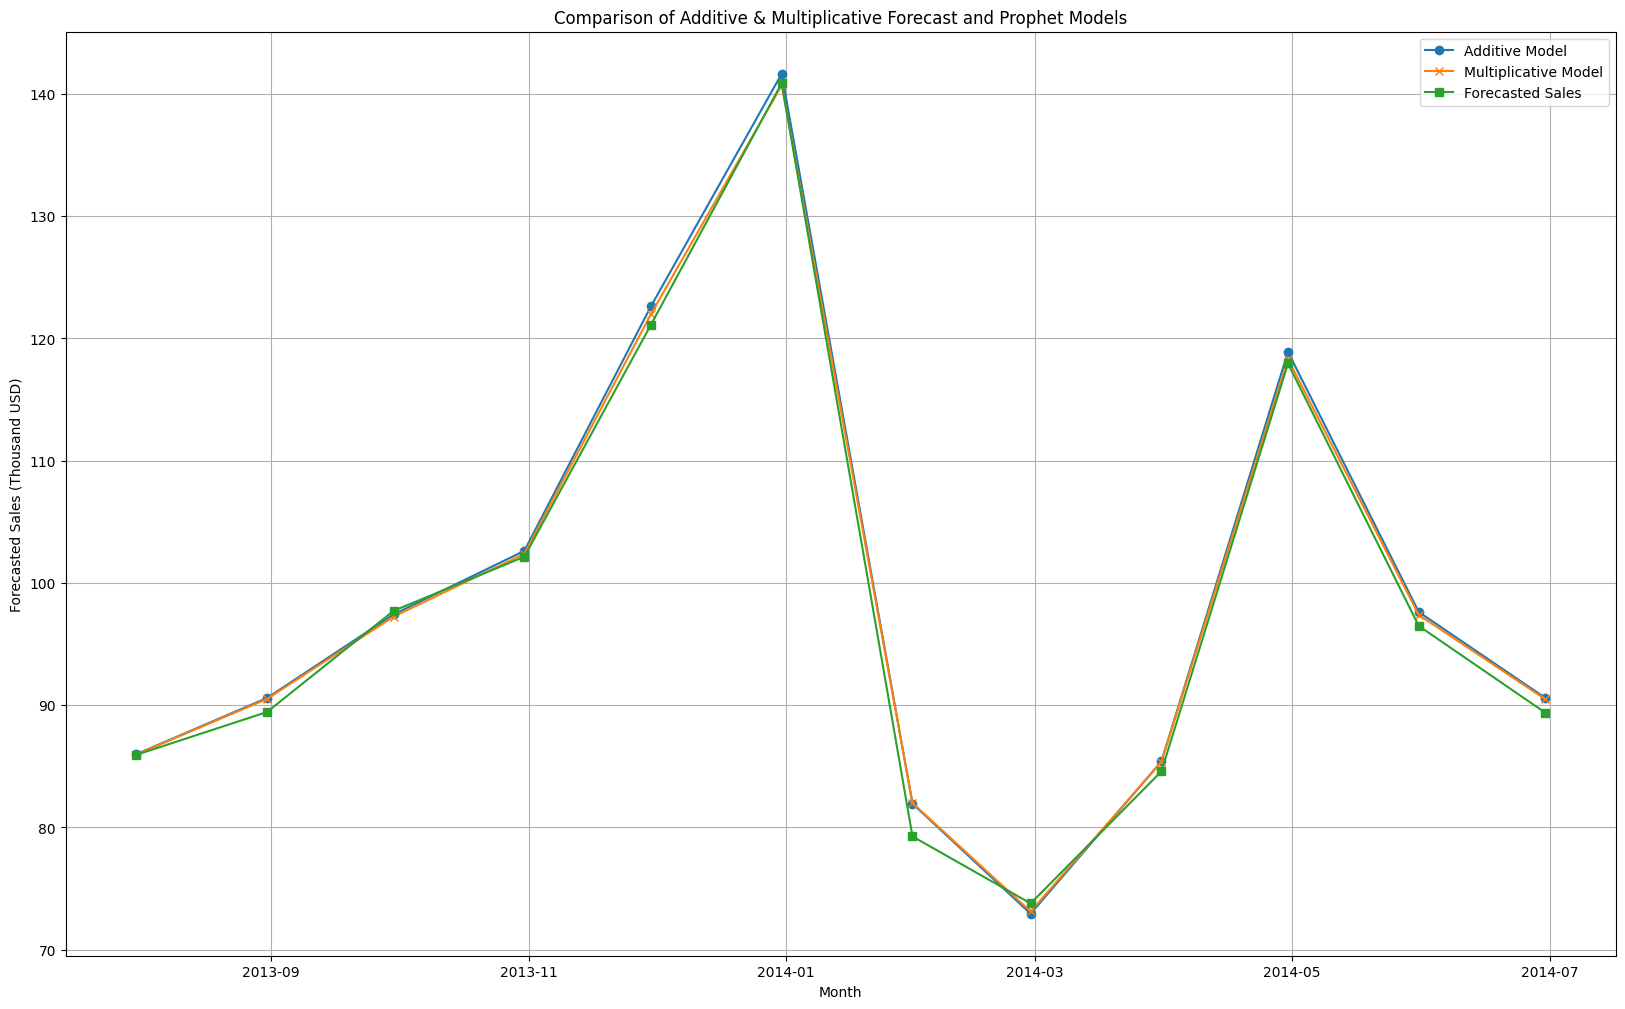

In [329]:
plt.figure(figsize=(20, 12))
plt.plot(forecast_df['Month'], forecast_df['Forecast Additive Model'], label='Additive Model', marker='o')
plt.plot(forecast_df['Month'], forecast_df['Forecast Multiplicative Model'], label='Multiplicative Model', marker='x')
plt.plot(last_12_months['ds'], last_12_months['yhat'], label='Forecasted Sales', marker='s')
plt.title('Comparison of Additive & Multiplicative Forecast and Prophet Models')
plt.xlabel('Month')
plt.ylabel('Forecasted Sales (Thousand USD)')
plt.legend()
plt.grid(True)
plt.show()

**Dựa vào bảng trên và đồ thị, ta thấy cả 3 mô hình đều có tuân theo xu hướng và mùa vụ**

*  Đồ thị của phương pháp tách là xấp xỉ nhau
*  Nhận thấy đồ thị của phương pháp prophet gân xấp xỉ với mô hình Tách trong những tháng đầu tiên, nhưng các tháng tiếp theo có sự chênh lệch hơn nhưng cũng không có sự chênh lệch lớn

# Như vậy, các phương pháp dự đoán đưa ra ở trên sẽ đúng ở những tháng đầu tiên, còn càng về sau, các phương pháp có chênh lệch nhưng không đáng kể, sự chênh lệch này có thể là do các yếu tố *irregular component*(Thành phần không đều) như đề cập ở đầu bài, gây nhiễu trong quá trình dự đoán.




---



---

